图像处理

In [2]:
# notebook 里自动绘制图像
%matplotlib inline 

import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# 读取图像
img = cv2.imread('../imgs/09.png')
# 绘制图像


##### 图像阈值

##### 图像平滑处理

##### 滤波

##### 图像腐蚀

腐蚀和膨胀对应的操作的对象都是二值数据，所以在处理图片前都是进行二值化操作，默认是转换为灰度图

腐蚀操作通过函数 `erode` 实现，它接收3个参数分别是：
1. 原图像
2. 操作区域？
3. 迭代次数

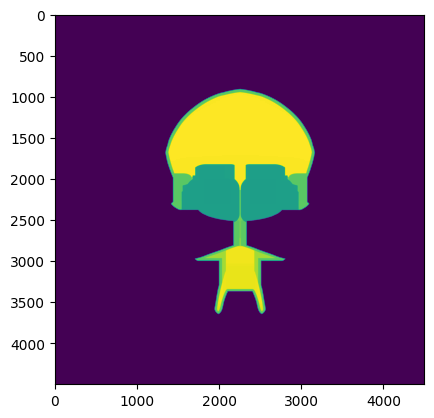

In [10]:
grayImage = cv2.imread('../imgs/09.png',0)
kernel = np.ones((100,100),np.uint8)
erosion = cv2.erode(grayImage,kernel,iterations = 3)
plt.imshow(erosion)

##### 图像膨胀

膨胀是腐蚀的逆操作，通过函数 `dilate` 实现

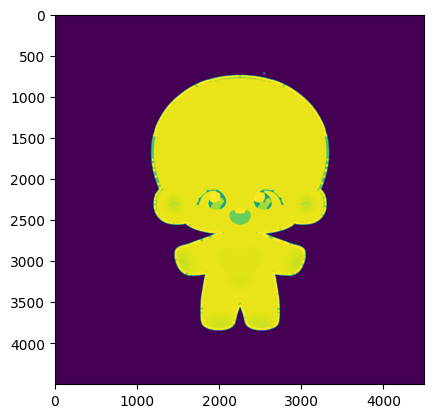

In [12]:
kernel = np.ones((10,10),np.uint8)
dilateImage = cv2.dilate(grayImage,kernel,iterations=3)
plt.imshow(dilateImage)

##### 开运算与闭运算

morphology: 形态学

开闭运算都是通过 `` 执行形态学操作

开运算：先腐蚀在膨胀



闭运算：先膨胀再腐蚀

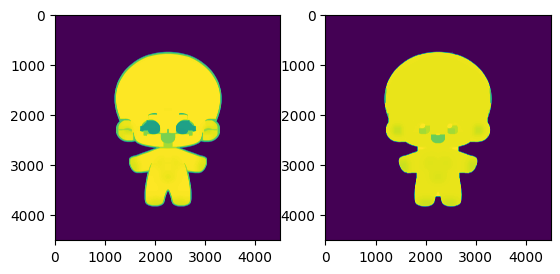

In [17]:
#开运算
kernel = np.ones((90,90),np.uint8)
openingImage = cv2.morphologyEx(grayImage,cv2.MORPH_OPEN, kernel)
plt.subplot(1,2,1)
plt.imshow(openingImage)
closedImage = cv2.morphologyEx(grayImage,cv2.MORPH_CLOSE, kernel)
plt.subplot(1,2,2)
plt.imshow(closedImage)

##### 梯度运算
梯度 = 膨胀 - 腐蚀

morphologyEx 类型为 MORPH_GRADIENT

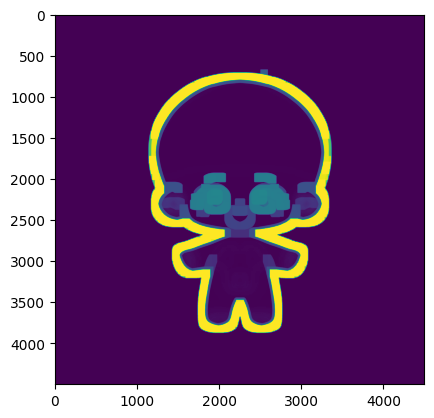

In [19]:
gradientImg = cv2.morphologyEx(grayImage,cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradientImg)

In [ ]:
##### 礼帽

礼/顶帽 = 原始输入-开运算结果

morphologyEx 类型为 MORPH_TOPHAT

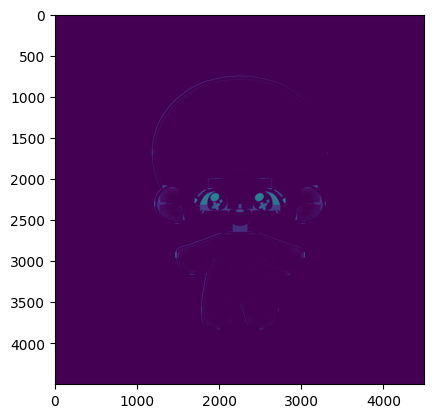

In [20]:
tophatImg = cv2.morphologyEx(grayImage,cv2.MORPH_TOPHAT, kernel)
plt.imshow(tophatImg)

In [ ]:
##### 黑帽

黑帽 = 闭运算结果 - 原始输入

morphologyEx 类型为 MORPH_BLACKHAT

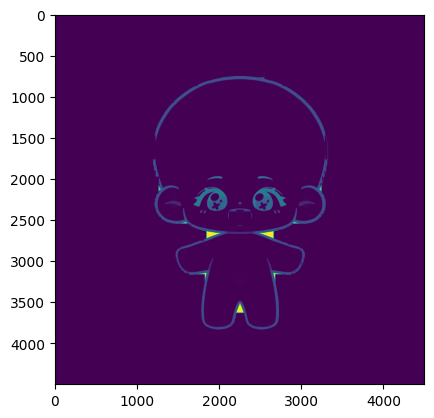

In [22]:
blackhatImg = cv2.morphologyEx(grayImage,cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhatImg)

##### Sobel 算子

提取梯度

边缘检测

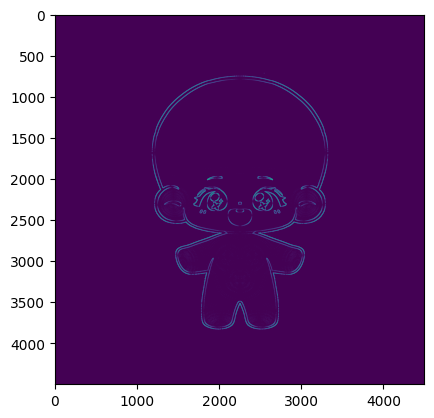

In [30]:
# dst = cv2.Sobel(grayImage,8,dx,dy,ksize)
# 计算梯度
dst = cv2.Sobel(grayImage, cv2.CV_64F, 1,1,ksize=5)
# 白到黑是正数，黑到白是负数，所有负数都会被截断为0，所以要取绝对值
dst = cv2.convertScaleAbs(dst)
plt.imshow(dst)